In [3]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris,load_boston # iris 데이터 제공 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor


In [4]:

iris = load_iris() # 딕셔너리 형태로 제공 (정확하게는 Bunch)
 
# iris 데이터 프레임 형태로 저장
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [81]:
iris_X = iris_df.iloc[:,:-1]
iris_Y = iris_df.iloc[::1]
X_train,X_test,y_train,y_test = train_test_split(iris_X,iris_Y,test_size = 0.2)

In [82]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape (120, 5) instead.

In [28]:
svm_model.score(X_test,y_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
svm_model.predict()

In [32]:
newDf =[iris_df.iloc[:,0].mean(),iris_df.iloc[:,1].mean(),iris_df.iloc[:,2].mean(),iris_df.iloc[:,3].mean()]

In [33]:
[newDf]

[[5.843333333333335, 3.057333333333334, 3.7580000000000027, 1.199333333333334]]

In [46]:
# boston(보스턴 위험지수 등의 내용 )데이터 가져오기 ()
boston_dt =  load_boston()['data']
boston_df = pd.DataFrame(boston_dt)
# 칼럼명 부여하기
boston_df.columns = load_boston()['feature_names']

boston_df['target'] = load_boston()['target']
boston_df.head(2)
boston_X = boston_df.iloc[:,:-1]
boston_Y = boston_df.iloc[::-1]

In [51]:
lm = LinearRegression()
lm.fit(boston_X,boston_Y)
lm.score(boston_X,boston_Y)

0.17083520591971987

In [54]:
rf = RandomForestRegressor()
rf.fit(boston_X,boston_Y)
rf.score(boston_X,boston_Y)

0.9392444239841805

In [56]:
# 각 feature의 중요도.
rf.feature_importances_

array([0.12175879, 0.03343799, 0.05720431, 0.00326683, 0.12190356,
       0.03759347, 0.03646101, 0.09372036, 0.0523892 , 0.09563247,
       0.27871203, 0.02752881, 0.04039118])

<BarContainer object of 13 artists>

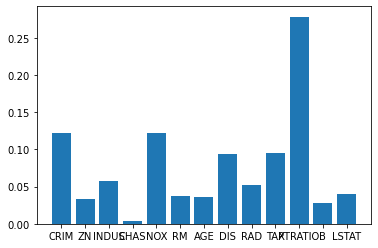

In [57]:
import matplotlib.pyplot as plt
plt.bar(load_boston()['feature_names'],rf.feature_importances_)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

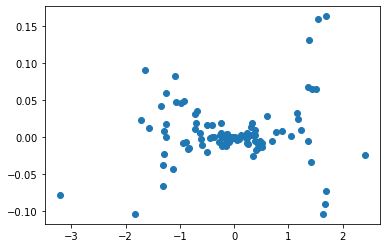

In [8]:
X= np.random.randn(100)
Y= X * 4 * np.random.randn(100)/100


plt.scatter(X,Y)

In [14]:
# w = 1
# ((Y-w*X)**2).mean()
w = -10
for _ in range(100):
    w+= 0.01
    print( ((Y-w*(X)**2).mean()) )

8.981654251842523
8.972669198802587
8.963684145762647
8.954699092722711
8.945714039682771
8.936728986642834
8.927743933602896
8.918758880562956
8.909773827523018
8.900788774483079
8.891803721443141
8.882818668403203
8.873833615363264
8.864848562323328
8.855863509283388
8.84687845624345
8.837893403203513
8.828908350163573
8.819923297123635
8.810938244083696
8.801953191043758
8.792968138003822
8.783983084963884
8.774998031923943
8.766012978884007
8.757027925844069
8.748042872804128
8.739057819764191
8.730072766724254
8.721087713684316
8.712102660644375
8.703117607604439
8.694132554564499
8.685147501524561
8.676162448484623
8.667177395444686
8.658192342404746
8.64920728936481
8.64022223632487
8.63123718328493
8.622252130244993
8.613267077205055
8.604282024165117
8.595296971125178
8.586311918085242
8.5773268650453
8.568341812005364
8.559356758965428
8.550371705925489
8.54138665288555
8.53240159984561
8.523416546805674
8.514431493765732
8.505446440725796
8.49646138768586
8.487476334645919
8

In [17]:
# err 모아두기
errs = []
for w in np.linspace(-60,60,100):
    err = ((Y-w*X)**2).mean()
    errs.append(err)



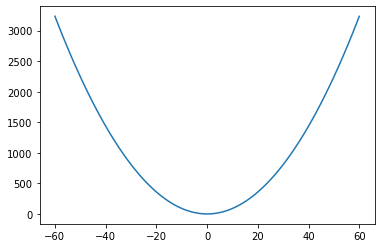

In [20]:

plt.plot(np.linspace(-60,60,100),errs)
# 아래 곡선은 2차원 방정식이다 즉, 해를 찾을 수 있다!


In [32]:
ir = 0.1

w = 100
# w = -60
for _ in range(3000):    
    y_hat = w*X
    w = w-ir*(X*(y_hat-Y)).mean()
w


0.005832909635725987

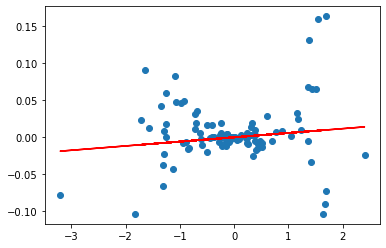

In [35]:
plt.plot(X,w*X, color ="red")
plt.scatter(X,Y)

In [17]:
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


df = sns.load_dataset('titanic')


In [35]:
df.who.value_counts()
dt = df.reset_index()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        891 non-null    int64   
 1   survived     891 non-null    int64   
 2   pclass       891 non-null    int64   
 3   sex          891 non-null    object  
 4   age          714 non-null    float64 
 5   sibsp        891 non-null    int64   
 6   parch        891 non-null    int64   
 7   fare         891 non-null    float64 
 8   embarked     889 non-null    object  
 9   class        891 non-null    category
 10  who          891 non-null    object  
 11  adult_male   891 non-null    bool    
 12  deck         203 non-null    category
 13  embark_town  889 non-null    object  
 14  alive        891 non-null    object  
 15  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB


<AxesSubplot:xlabel='index', ylabel='embarked'>

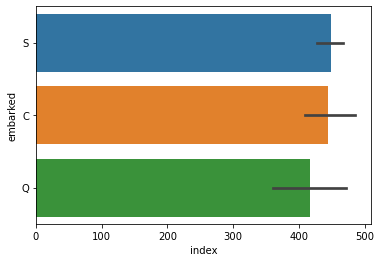

In [43]:

sns.barplot(x='index',y ="embarked",data=dt)

In [56]:
# 값이 있는지 여부 판단,
df[df.age.isna()]
# 값이 없다면 칼럼을 삭제 혹은 row를 삭제하는 방법이 있다.
# 원본 데이터를 보관하는 것이 좋으니 .cpoy를 이용하여 복사해둔다.
cl_df = df.copy()
# 특정할 값이 없기 떄문에 median값을 삽입해준다.
cl_df.fillna(value=cl_df.median() , inplace=True)

In [60]:
# cl_df.info()
cl_df.embarked.value_counts()


S    646
C    168
Q     77
Name: embarked, dtype: int64

In [62]:
cl_df.embarked.fillna('S',inplace=True)
cl_df.embarked.value_counts()
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [64]:
cl_df.drop(['sex','class','deck','embark_town','alive'],axis=1 ,inplace=True)

In [65]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   embarked    891 non-null    object 
 7   who         891 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [83]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()

#각 값을 인덱싱하여 1,2,3...로 인코딩해줌.
L_embarked = le.fit_transform(cl_df.embarked)
#
# oe_embarked = oe.fit_transform(cl_df.embarked.values.reshape(-1,1)).toarray()
# oe_embarked
le = LabelEncoder()
l_who = le.fit_transform(cl_df.who)
l_who
cl_df.info()

cl_df['embarked'] = L_embarked
cl_df['who'] = l_who
titan_X = cl_df.iloc[:,1:]
titan_y = cl_df.iloc[:,0]
x_train, x_test , y_train, y_test = train_test_split(titan_X,titan_y,test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   embarked    891 non-null    int64  
 7   who         891 non-null    int64  
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [84]:
ir = 

NameError: name 'LogisticRegration' is not defined